Robustness analysis
- In this notebook, a robustness analysis is conducted, based upon the experiments with the 30 saved promising policies
- Mean and max regret scores are computed for all KPI's seperately
- Overall mean regret socres are computed
- Parcoords are created for the mean and max regret scores, over four important KPI's, to illustrate possible trade-offs

In [2]:
# ROBUSTNESS ANALYSIS
from ema_workbench import load_results
import matplotlib.pyplot as plt
import seaborn as sns
#from ema_workbench.analysis import RobustnessEvaluator
#from ema_workbench.em_framework.optimization import ScalarOutcome
import pandas as pd
import numpy as np
from ema_workbench import Policy
from ema_workbench import Scenario


# Load results
experiments, outcomes = load_results("results/promising_resample_1000.tar.gz")
policies = experiments["policy"].unique()
outcome_names = list(outcomes.keys())


Regret analysis

- First, regret scores are computed for each policies, over all scenarios
- Second, the regret scores are normalized, in order to facilitate comparison between scores on different objectives and to compute overall mean regret scores
- The regret scores are plotted in a heatmap, to faciliate comparison between different policies

In [3]:
# Setup a dataframe for the outcomes
# Add scenario and policy as columns, in order to calculate regret over scenarios and for each policy

outcomes = pd.DataFrame(outcomes)
outcomes['scenario'] = experiments.scenario
outcomes['policy'] = experiments.policy


def calculate_regret(x):

    best = x.min(numeric_only=True)
    regret = best + x.loc[:, best.index]
    regret['policy'] = x.policy
    return regret

# Calculate regret on a scenario by scenario basis
regret = outcomes.groupby('scenario', group_keys=False).apply(calculate_regret)

# Calculate the maximum and mean regret for each policy
max_regret = regret.groupby('policy').max()
mean_regret= regret.groupby('policy').mean()

C:\Users\tlwal\AppData\Local\Temp\ipykernel_45976\3360840274.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  regret = outcomes.groupby('scenario', group_keys=False).apply(calculate_regret)
C:\Users\tlwal\AppData\Local\Temp\ipykernel_45976\3360840274.py:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  regret = outcomes.groupby('scenario', group_keys=False).apply(calculate_regret)
C:\Users\tlwal\AppData\Local\Temp\ipykernel_45976\3360840274.py:20: FutureWarning: The default of observed=False is deprecate

In [3]:
mean_regret.head()

,Gelderland Expected Annual Damage,Gelderland Dike Investment Costs,Gelderland Expected Number of Deaths,Overijssel Expected Annual Damage,Overijssel Dike Investment Costs,Overijssel Expected Number of Deaths,RfR Total Costs,Expected Evacuation Costs
policy,,,,,,,,
pol_000,6.312155e+08,6.261160e+08,0.548356,1.225215e+07,3.035153e+07,0.007754,121200000.0,0.000000
pol_001,7.606397e+06,6.054299e+08,0.019446,1.361367e+06,3.880493e+07,0.000976,357700000.0,0.000000
pol_002,1.242761e+08,4.514227e+08,0.025400,1.588452e+07,3.667233e+07,0.001199,121200000.0,7331.159654
pol_003,9.253345e+07,4.882024e+08,0.182608,1.470251e+06,3.768361e+07,0.001049,121200000.0,0.000000
pol_004,3.376830e+08,4.833947e+08,0.117715,1.476709e+08,6.320800e+06,0.041244,61400000.0,7232.465516


In [4]:
# Normalize regret columns (min-max scaling)
for df in [mean_regret, max_regret]:
    for col in df.columns:
        mn, mx = df[col].min(), df[col].max()
        norm_col = col + "_norm"
        df[norm_col] = (df[col] - mn) / (mx - mn) if mx > mn else 0.0

# Overall scores, exclude Gelderland Expected Annual Damage and Gelderland Dike Investment Costs
mean_regret_2 = mean_regret.drop(columns=["Gelderland Expected Annual Damage_norm", "Gelderland Dike Investment Costs_norm"])
max_regret_2 = max_regret.drop(columns=["Gelderland Expected Annual Damage_norm", "Gelderland Dike Investment Costs_norm"])
# Normalize again for overall scores
mean_norm_cols = [col for col in mean_regret_2.columns if col.endswith("_norm")]
max_norm_cols = [col for col in max_regret_2.columns if col.endswith("_norm")]

mean_regret["overall_mean_regret"] = mean_regret_2[mean_norm_cols].mean(axis=1)
max_regret["overall_max_regret"] = max_regret_2[max_norm_cols].max(axis=1)
max_regret["overall_max_regret_mean"] = max_regret_2[max_norm_cols].mean(axis=1)


In [19]:
print(mean_regret.columns)

Index(['Gelderland Expected Annual Damage', 'Gelderland Dike Investment Costs',
       'Gelderland Expected Number of Deaths',
       'Overijssel Expected Annual Damage', 'Overijssel Dike Investment Costs',
       'Overijssel Expected Number of Deaths', 'RfR Total Costs',
       'Expected Evacuation Costs',
       'Gelderland Expected Number of Deaths_norm',
       'Overijssel Expected Annual Damage_norm',
       'Overijssel Dike Investment Costs_norm',
       'Overijssel Expected Number of Deaths_norm', 'RfR Total Costs_norm',
       'Expected Evacuation Costs_norm', 'overall_mean_regret',
       'Gelderland Expected Number of Deaths_norm_norm',
       'Overijssel Expected Annual Damage_norm_norm',
       'Overijssel Dike Investment Costs_norm_norm',
       'Overijssel Expected Number of Deaths_norm_norm',
       'RfR Total Costs_norm_norm', 'Expected Evacuation Costs_norm_norm',
       'overall_mean_regret_norm',
       'Gelderland Expected Annual Damage_norm_norm',
       'Gelderlan

In [20]:
mean_regret.head()

,Gelderland Expected Annual Damage,Gelderland Dike Investment Costs,Gelderland Expected Number of Deaths,Overijssel Expected Annual Damage,Overijssel Dike Investment Costs,Overijssel Expected Number of Deaths,RfR Total Costs,Expected Evacuation Costs,Gelderland Expected Number of Deaths_norm,Overijssel Expected Annual Damage_norm,...,overall_mean_regret_norm_norm_norm,Gelderland Expected Annual Damage_norm_norm_norm_norm,Gelderland Dike Investment Costs_norm_norm_norm_norm,Gelderland Expected Number of Deaths_norm_norm_norm_norm_norm,Overijssel Expected Annual Damage_norm_norm_norm_norm_norm,Overijssel Dike Investment Costs_norm_norm_norm_norm_norm,Overijssel Expected Number of Deaths_norm_norm_norm_norm_norm,RfR Total Costs_norm_norm_norm_norm_norm,Expected Evacuation Costs_norm_norm_norm_norm_norm,overall_mean_regret_norm_norm_norm_norm
policy,,,,,,,,,,,,,,,,,,,,,
pol_000,6.312155e+08,6.261160e+08,0.548356,1.225215e+07,3.035153e+07,0.007754,121200000.0,0.000000,0.997608,0.081053,...,0.790026,0.959647,0.785838,0.997608,0.081053,0.346917,0.069600,0.092959,0.000000,0.790026
pol_001,7.606397e+06,6.054299e+08,0.019446,1.361367e+06,3.880493e+07,0.000976,357700000.0,0.000000,0.035378,0.009006,...,0.011574,0.011564,0.710803,0.035378,0.009006,0.443539,0.008761,0.274352,0.000000,0.011574
pol_002,1.242761e+08,4.514227e+08,0.025400,1.588452e+07,3.667233e+07,0.001199,121200000.0,7331.159654,0.046210,0.105082,...,0.259442,0.188939,0.152168,0.046210,0.105082,0.419163,0.010758,0.092959,0.649389,0.259442
pol_003,9.253345e+07,4.882024e+08,0.182608,1.470251e+06,3.768361e+07,0.001049,121200000.0,0.000000,0.332213,0.009726,...,0.000000,0.140680,0.285580,0.332213,0.009726,0.430722,0.009415,0.092959,0.000000,0.000000
pol_004,3.376830e+08,4.833947e+08,0.117715,1.476709e+08,6.320800e+06,0.041244,61400000.0,7232.465516,0.214155,0.976902,...,1.000000,0.513385,0.268141,0.214155,0.976902,0.072247,0.370191,0.047093,0.640647,1.000000


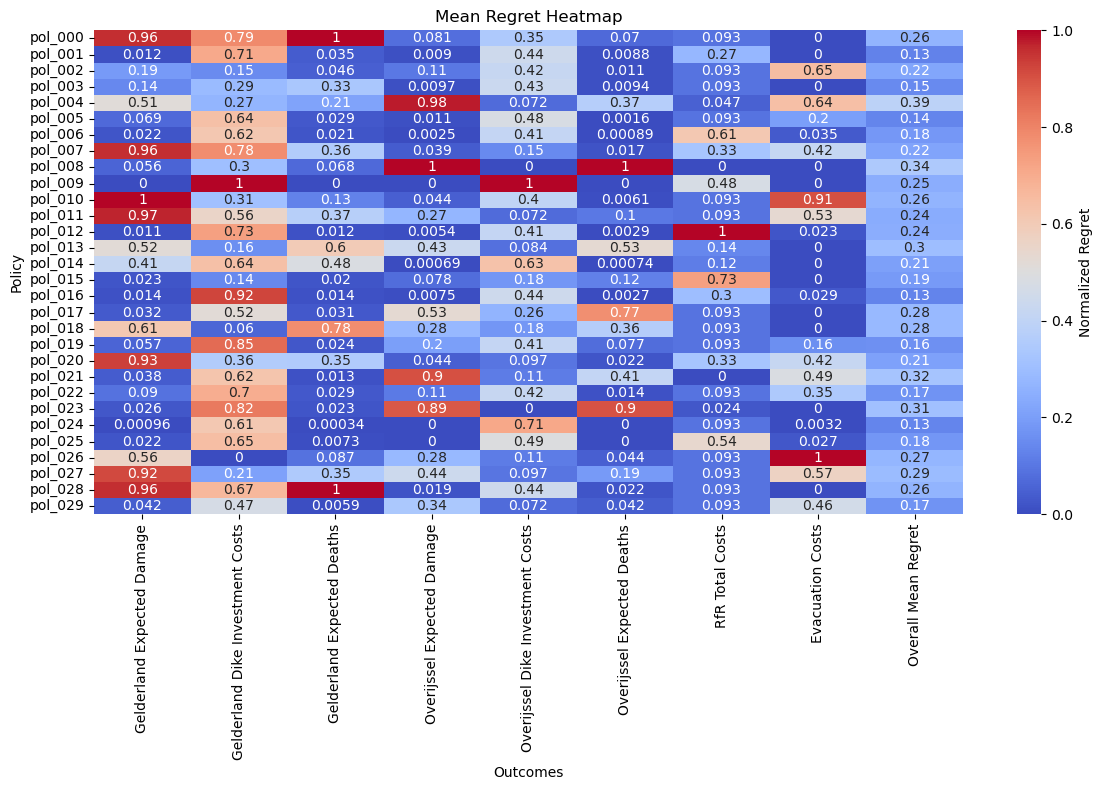

In [ ]:
#For mean regret, create a heatmap from the dataframe
plt.figure(figsize=(12, 8)) 

#Plotting all outcomes + overall mean regret
cols_to_plot =  ["Gelderland Expected Annual Damage_norm"] + ["Gelderland Dike Investment Costs_norm"] + mean_norm_cols + ["overall_mean_regret"]


# Renaming the columns
mean_regret_renamed = mean_regret[cols_to_plot].rename(columns={
    "Gelderland Expected Annual Damage_norm": "Gelderland Expected Damage",
    "Gelderland Dike Investment Costs_norm": "Gelderland Dike Investment Costs",
    "Gelderland Expected Number of Deaths_norm": "Gelderland Expected Deaths",
    "Overijssel Expected Annual Damage_norm": "Overijssel Expected Damage",
    "Overijssel Dike Investment Costs_norm": "Overijssel Dike Investment Costs",
    "Overijssel Expected Number of Deaths_norm": "Overijssel Expected Deaths",
    "RfR Total Costs_norm": "RfR Total Costs",
    "Expected Evacuation Costs_norm": "Evacuation Costs",
    "overall_mean_regret": "Overall Mean Regret",
})


# Plot heatmap 
sns.heatmap(mean_regret_renamed, annot=True, cmap='coolwarm', cbar_kws={'label': 'Normalized Regret'})
plt.title("Mean Regret Heatmap")

plt.xlabel("Outcomes")
plt.ylabel("Policy")
plt.tight_layout()
plt.show()



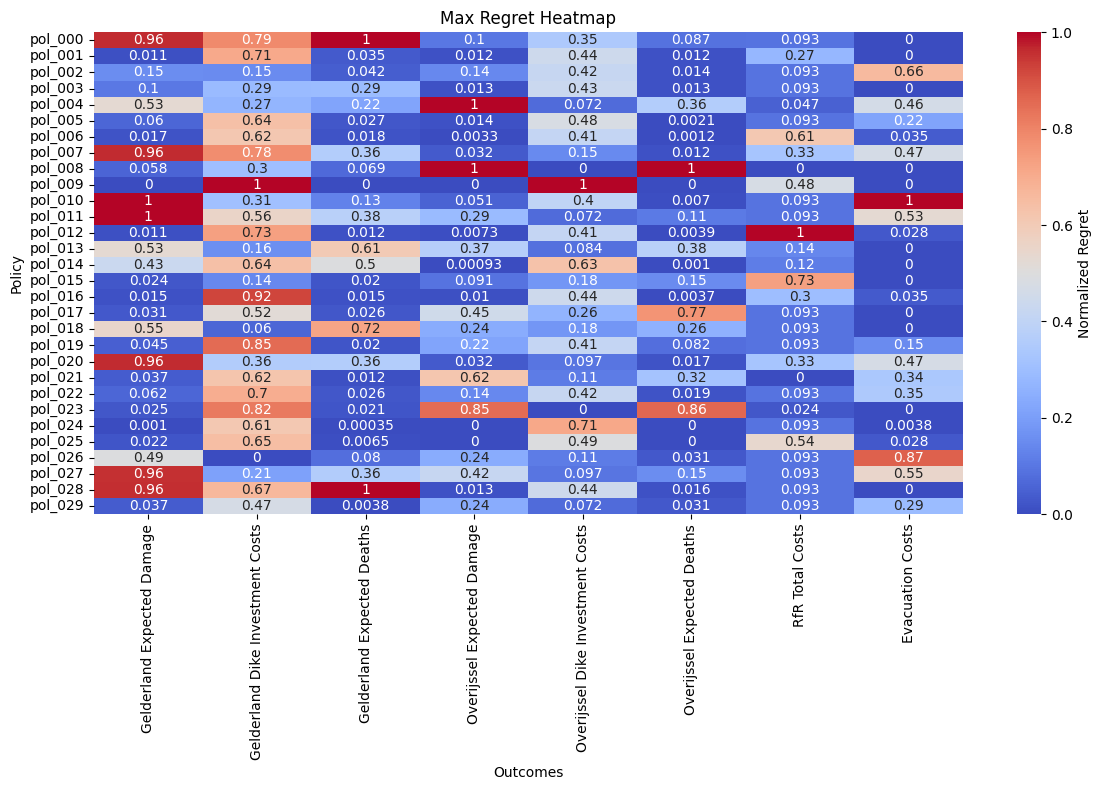

In [6]:
#For max regret, create a heatmap from the dataframe
plt.figure(figsize=(12, 8)) 

#Plotting all outcomes 
cols_to_plot =  ["Gelderland Expected Annual Damage_norm"] + ["Gelderland Dike Investment Costs_norm"] + max_norm_cols


# Renaming the columns
max_regret_renamed = max_regret[cols_to_plot].rename(columns={
    "Gelderland Expected Annual Damage_norm": "Gelderland Expected Damage",
    "Gelderland Dike Investment Costs_norm": "Gelderland Dike Investment Costs",
    "Gelderland Expected Number of Deaths_norm": "Gelderland Expected Deaths",
    "Overijssel Expected Annual Damage_norm": "Overijssel Expected Damage",
    "Overijssel Dike Investment Costs_norm": "Overijssel Dike Investment Costs",
    "Overijssel Expected Number of Deaths_norm": "Overijssel Expected Deaths",
    "RfR Total Costs_norm": "RfR Total Costs",
    "Expected Evacuation Costs_norm": "Evacuation Costs",
})


# Plot heatmap 
sns.heatmap(max_regret_renamed, annot=True, cmap='coolwarm', cbar_kws={'label': 'Normalized Regret'})
plt.title("Max Regret Heatmap")

plt.xlabel("Outcomes")
plt.ylabel("Policy")
plt.tight_layout()
plt.show()



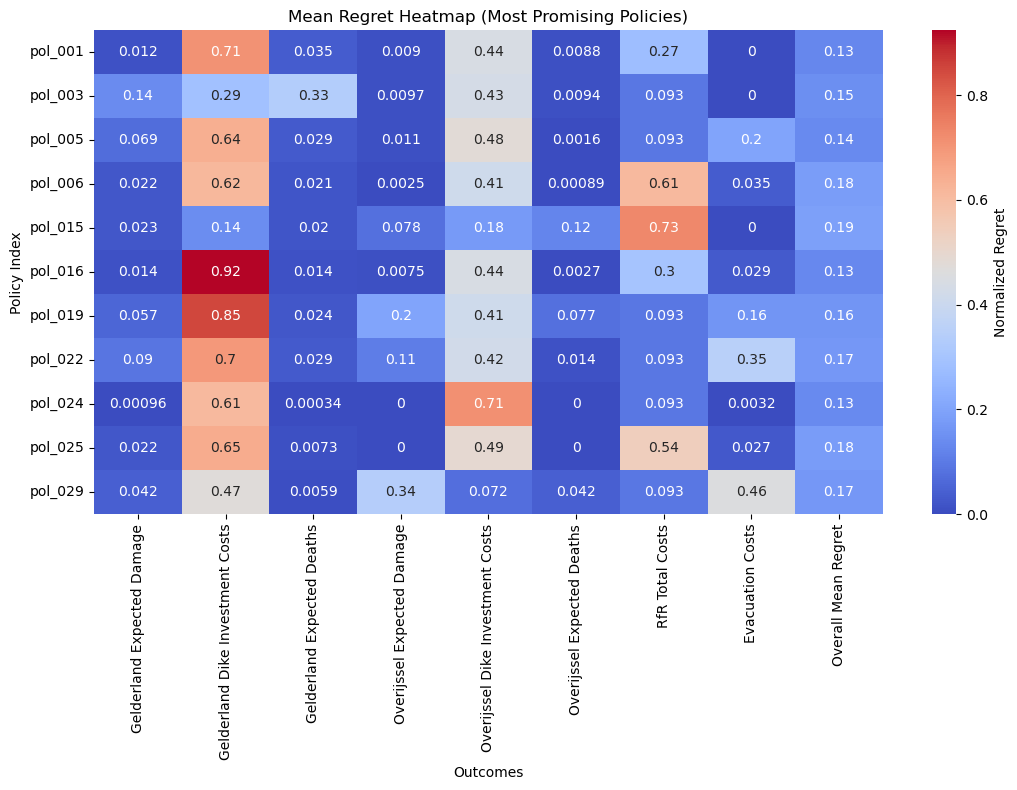

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns



# Plotting all outcomes + overall mean regret
cols_to_plot = [
    "Gelderland Expected Annual Damage_norm",
    "Gelderland Dike Investment Costs_norm"
] + mean_norm_cols + ["overall_mean_regret"]

# Rename columns
mean_regret_renamed = mean_regret[cols_to_plot].rename(columns={
    "Gelderland Expected Annual Damage_norm": "Gelderland Expected Damage",
    "Gelderland Dike Investment Costs_norm": "Gelderland Dike Investment Costs",
    "Gelderland Expected Number of Deaths_norm": "Gelderland Expected Deaths",
    "Overijssel Expected Annual Damage_norm": "Overijssel Expected Damage",
    "Overijssel Dike Investment Costs_norm": "Overijssel Dike Investment Costs",
    "Overijssel Expected Number of Deaths_norm": "Overijssel Expected Deaths",
    "RfR Total Costs_norm": "RfR Total Costs",
    "Expected Evacuation Costs_norm": "Evacuation Costs",
    "overall_mean_regret": "Overall Mean Regret",
})

# Select the rows of the most promising policies
selected_rows = mean_regret_renamed.iloc[[1, 3, 5, 6, 15, 16, 19, 22, 24, 25, 29]]

# Plot heatmap
plt.figure(figsize=(11, 8))
sns.heatmap(selected_rows, annot=True, cmap='coolwarm', cbar_kws={'label': 'Normalized Regret'})
plt.title("Mean Regret Heatmap (Most Promising Policies)")
plt.xlabel("Outcomes")
plt.ylabel("Policy Index")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd


policies_df = pd.DataFrame(experiments)

# Drop every other row (keep even-indexed rows)
policies_df = policies_df.iloc[::2]

# Select the last 20 columns except the last two (i.e., -22 to -2)
policies_df_rfr = policies_df.iloc[:, -34:-19]

# Set custom index from pol_000 to pol_029
policies_df_rfr.index = [f"pol_{i:03d}" for i in range(len(policies_df_rfr))]

selected_indices = [1, 3, 5, 6, 15, 16, 19, 22, 24, 25, 29]
row_labels = [f"pol_{i:03d}" for i in selected_indices]

policies_df_rfr.loc[row_labels]

,0_RfR 0,0_RfR 1,0_RfR 2,1_RfR 0,1_RfR 1,1_RfR 2,2_RfR 0,2_RfR 1,2_RfR 2,3_RfR 0,3_RfR 1,3_RfR 2,4_RfR 0,4_RfR 1,4_RfR 2
pol_001,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0
pol_003,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
pol_005,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
pol_006,0,0,0,0,1,1,0,0,0,1,1,1,0,0,0
pol_015,0,0,1,0,1,0,0,1,0,1,1,1,0,0,1
pol_016,0,0,1,0,0,0,0,1,1,0,1,1,0,0,0
pol_019,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
pol_022,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
pol_024,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
pol_025,0,1,0,0,0,0,0,0,0,1,1,1,1,0,0


In [73]:
import pandas as pd


policies_df = pd.DataFrame(experiments)

# Drop every other row (keep even-indexed rows)
policies_df = policies_df.iloc[::2]

# Select the last 20 columns except the last two (i.e., -22 to -2)
policies_df_d = policies_df.iloc[:, -19:-3]

# Set custom index from pol_000 to pol_029
policies_df_d.index = [f"pol_{i:03d}" for i in range(len(policies_df_d))]

selected_indices = [1, 3, 5, 6, 15, 16, 19, 22, 24, 25, 29]
row_labels = [f"pol_{i:03d}" for i in selected_indices]

policies_df_d.loc[row_labels]

,EWS_DaysToThreat,A.1_DikeIncrease 0,A.1_DikeIncrease 1,A.1_DikeIncrease 2,A.2_DikeIncrease 0,A.2_DikeIncrease 1,A.2_DikeIncrease 2,A.3_DikeIncrease 0,A.3_DikeIncrease 1,A.3_DikeIncrease 2,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2
pol_001,0,7,3,5,7,0,6,0,3,1,3,0,0,3,0,0
pol_003,0,6,0,2,0,7,6,0,0,1,2,0,0,3,0,0
pol_005,2,7,3,4,7,0,5,0,2,1,3,0,0,4,0,0
pol_006,1,7,5,0,6,1,5,0,2,4,3,0,0,2,0,0
pol_015,0,5,0,1,0,0,5,7,1,3,3,0,1,0,0,0
pol_016,1,4,5,5,6,6,7,0,0,1,3,0,0,3,0,0
pol_019,1,4,6,6,1,2,8,7,0,3,0,0,3,2,0,0
pol_022,2,5,5,6,0,5,7,0,1,4,1,0,0,3,0,0
pol_024,3,6,2,5,7,0,3,4,0,6,9,0,0,7,0,0
pol_025,1,4,2,6,0,3,5,7,3,5,4,0,0,4,0,0


In [75]:
selected_rows = policies_df_d.loc[row_labels]

# Calculate the sum of each column for these rows
column_sums = selected_rows.sum()
column_sums

EWS_DaysToThreat      14
A.1_DikeIncrease 0    61
A.1_DikeIncrease 1    35
A.1_DikeIncrease 2    41
A.2_DikeIncrease 0    34
A.2_DikeIncrease 1    26
A.2_DikeIncrease 2    58
A.3_DikeIncrease 0    28
A.3_DikeIncrease 1    13
A.3_DikeIncrease 2    36
A.4_DikeIncrease 0    31
A.4_DikeIncrease 1     1
A.4_DikeIncrease 2     4
A.5_DikeIncrease 0    31
A.5_DikeIncrease 1     0
A.5_DikeIncrease 2     0
dtype: int64

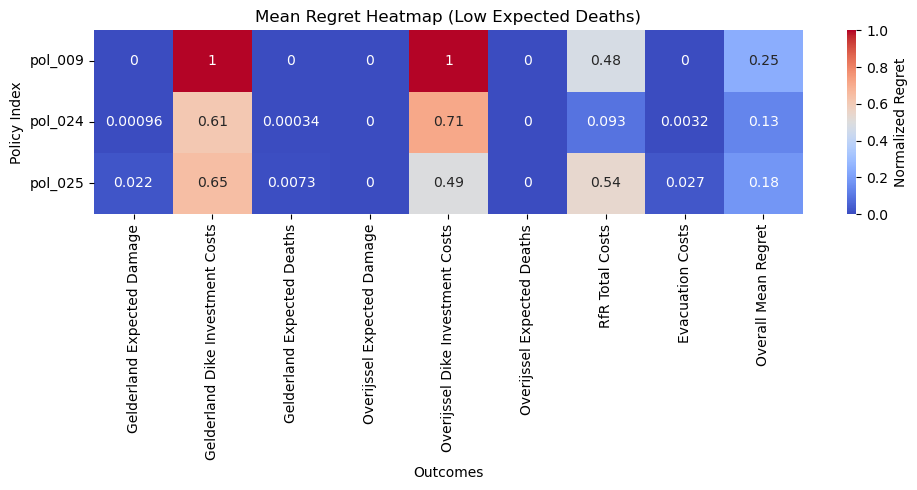

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select specific rows by index


cols_to_plot = [
    "Gelderland Expected Annual Damage_norm",
    "Gelderland Dike Investment Costs_norm"
] + mean_norm_cols + ["overall_mean_regret"]

# Rename columns
mean_regret_renamed = mean_regret[cols_to_plot].rename(columns={
    "Gelderland Expected Annual Damage_norm": "Gelderland Expected Damage",
    "Gelderland Dike Investment Costs_norm": "Gelderland Dike Investment Costs",
    "Gelderland Expected Number of Deaths_norm": "Gelderland Expected Deaths",
    "Overijssel Expected Annual Damage_norm": "Overijssel Expected Damage",
    "Overijssel Dike Investment Costs_norm": "Overijssel Dike Investment Costs",
    "Overijssel Expected Number of Deaths_norm": "Overijssel Expected Deaths",
    "RfR Total Costs_norm": "RfR Total Costs",
    "Expected Evacuation Costs_norm": "Evacuation Costs",
    "overall_mean_regret": "Overall Mean Regret",
})

# Select specific rows from the renamed DataFrame
selected_rows = mean_regret_renamed.iloc[[9,24,25]]

# Plot heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(selected_rows, annot=True, cmap='coolwarm', cbar_kws={'label': 'Normalized Regret'})
plt.title("Mean Regret Heatmap (Low Expected Deaths)")
plt.xlabel("Outcomes")
plt.ylabel("Policy Index")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

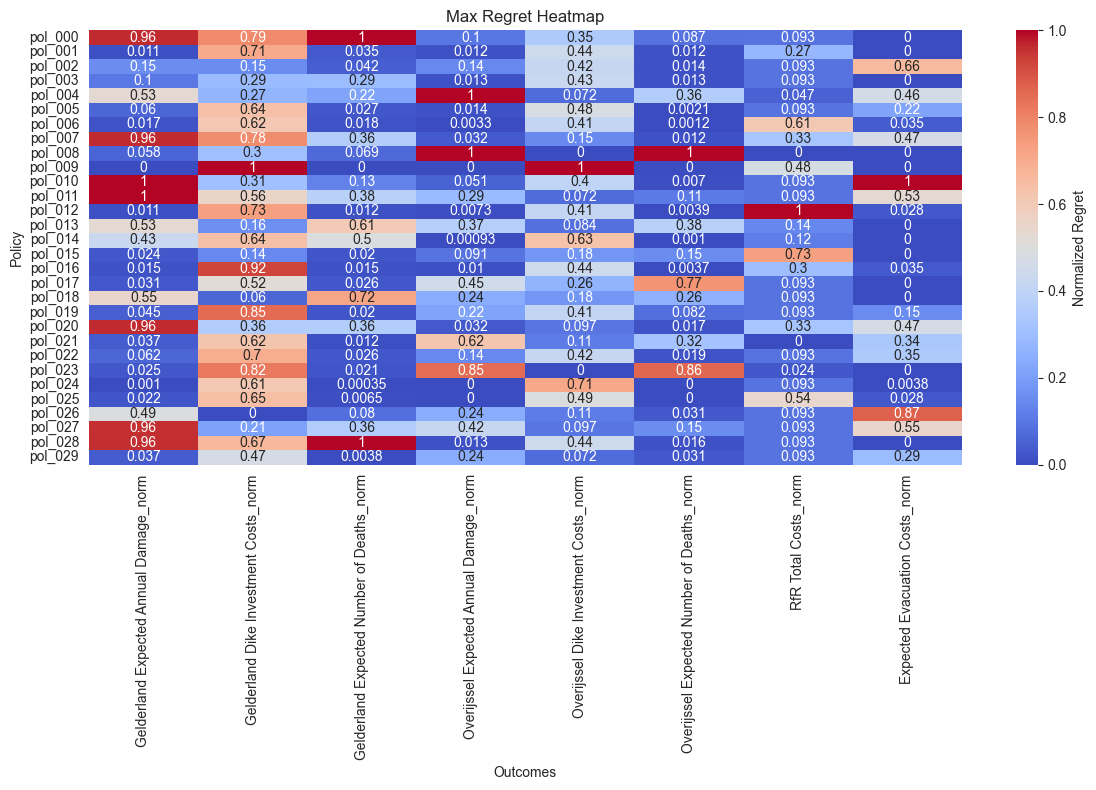

In [ ]:
plt.figure(figsize=(12, 8))
#sns.heatmap(df_max_regret.head(20)[max_norm_cols], annot=True, cmap='coolwarm', cbar_kws={'label': 'Normalized Regret'})
#plt.title("Max Regret Heatmap (Top 20 Policies)")


sns.heatmap(max_regret[max_norm_cols], annot=True, cmap='coolwarm', cbar_kws={'label': 'Normalized Regret'})
plt.title("Max Regret Heatmap")

plt.xlabel("Outcomes") 
plt.ylabel("Policy")
#plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

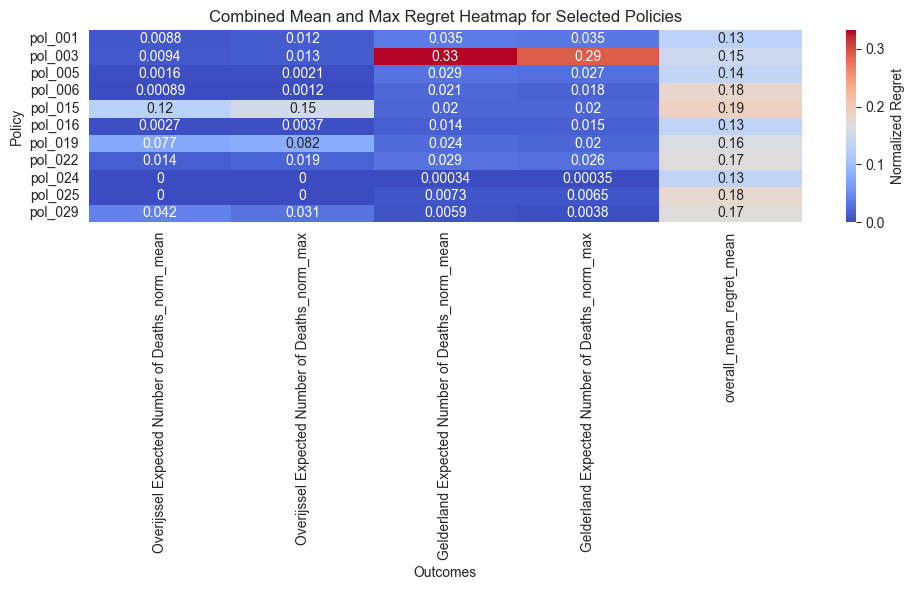

In [82]:
# Plot the mean and max regret next to each other in one heatmap, of a certain set of policies of 'Overijssel Expected Number of Deaths_norm' and 'Gelderland Expected Number of Deaths_norm'

# Define the policies of interest and extract the relevant columns
policies_of_interest = ['pol_001', 'pol_003', 'pol_005', 'pol_006', 'pol_015', 'pol_016', 'pol_019', 'pol_022', 'pol_024', 'pol_025', 'pol_029']
mean_regret_interest = mean_regret.loc[policies_of_interest, ['Overijssel Expected Number of Deaths_norm', 'Gelderland Expected Number of Deaths_norm', 'overall_mean_regret']]
max_regret_interest = max_regret.loc[policies_of_interest, ['Overijssel Expected Number of Deaths_norm', 'Gelderland Expected Number of Deaths_norm']]
# Combine mean and max regret into one DataFrame for plotting
combined_regret = pd.concat([mean_regret_interest.add_suffix('_mean'), max_regret_interest.add_suffix('_max')], axis=1)
# Set the column so that the two Overijssel and Gelderland columns are next to each other
combined_regret = combined_regret.reindex(columns=[
    'Overijssel Expected Number of Deaths_norm_mean', 
    'Overijssel Expected Number of Deaths_norm_max',
    'Gelderland Expected Number of Deaths_norm_mean',
    'Gelderland Expected Number of Deaths_norm_max',
    'overall_mean_regret_mean'])
# Plot the combined heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(combined_regret, annot=True, cmap='coolwarm', cbar_kws={'label': 'Normalized Regret'})
plt.title("Combined Mean and Max Regret Heatmap for Selected Policies")
plt.xlabel("Outcomes") 
plt.ylabel("Policy") 
plt.tight_layout()
plt.show()  

Parallel coordinates plot (Parcoords)
- Create parcoords with the regret scores, to visualise possible trade-offs of policies on specified objectives
- Only use a selection of objectives, to improve interpretability
- Look at the primary objectives for the waterboard + one examplaric cost metric 



StopIteration: 

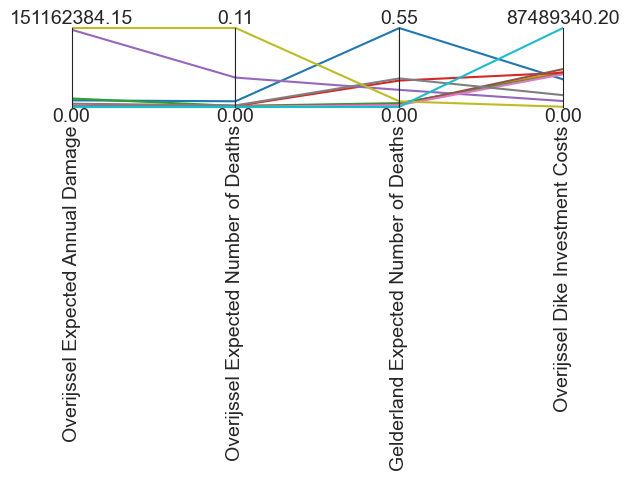

In [60]:
# Select only the relevant columns for the parallel coordinates plot
selected_cols = [
    "Overijssel Expected Annual Damage",
    "Overijssel Expected Number of Deaths",
    "Gelderland Expected Number of Deaths",
    "Overijssel Dike Investment Costs",
]

#mean_regret_top20_selected = df_mean_regret.head(20)[selected_cols]
mean_regret_selected = mean_regret[selected_cols]

# Get limits for the selected columns
limits_selected = parcoords.get_limits(mean_regret_selected)

# Create parallel axes for the selected outcomes
paraxes_selected = parcoords.ParallelAxes(limits_selected)

# Plot all rows in the selected mean regret DataFrame as parallel coordinates
colors = iter(sns.color_palette())
for i, row in mean_regret_selected.iterrows():
    color = next(colors)
    paraxes_selected.plot(row, label=f'Policy {i}', color=color)

paraxes_selected.legend()
plt.title("Parallel Coordinates Plot\nSelected Outcomes Only")
plt.xlabel("Outcomes")
plt.ylabel("Mean Regret")
plt.show()

StopIteration: 

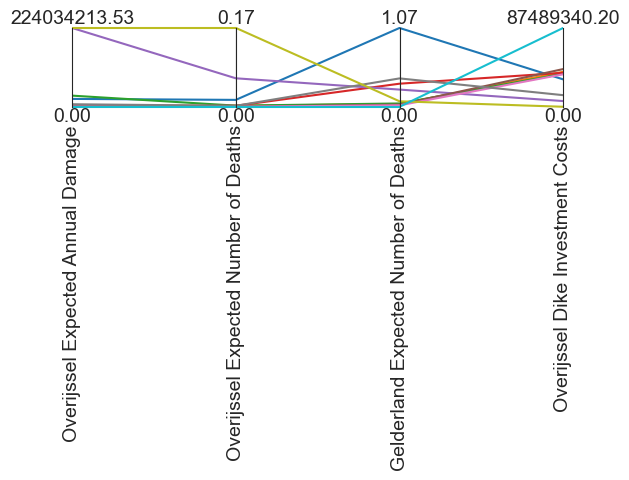

In [41]:
# Same for max regret

# Select only the relevant columns for the parallel coordinates plot
selected_cols = [
    "Overijssel Expected Annual Damage",
    "Overijssel Expected Number of Deaths",
    "Gelderland Expected Number of Deaths",
    "Overijssel Dike Investment Costs",
]

#max_regret_top20_selected = df_max_regret.head(20)[selected_cols]
max_regret_selected = max_regret[selected_cols]

# Get limits for the selected columns
limits_selected = parcoords.get_limits(max_regret_selected)

# Create parallel axes for the selected outcomes
paraxes_selected = parcoords.ParallelAxes(limits_selected)

# Plot all rows in the selected mean regret DataFrame as parallel coordinates
colors = iter(sns.color_palette())
for i, row in max_regret_selected.iterrows():
    color = next(colors)
    paraxes_selected.plot(row, label=f'Policy {i}', color=color)

paraxes_selected.legend()
plt.title("Parallel Coordinates Plot\nSelected Outcomes Only")
plt.xlabel("Outcomes")
plt.ylabel("Max Regret")
plt.show()